# Tutorial 1, Big Data Analytics 24/25
## K‑Means Clustering Review


### Overview  
K‑means clustering is an **unsupervised** machine‑learning algorithm used for partitioning a dataset into K clusters. The algorithm aims to minimise the sum of squared distances between data points and their assigned cluster centroids.


### Steps
1. **Initialise** K centroids randomly or using a specific initialisation method.  
2. **Assign** each data point to the nearest centroid based on Euclidean distance.  
3. **Update** the centroids by calculating the mean of all data points assigned to each cluster.  
4. **Repeat** steps&nbsp;2 and 3 until convergence or a maximum number of iterations is reached.


### Euclidean Distance  

The Euclidean distance between two points  
$x=(x_{1},\dots,x_{n})$ and $y=(y_{1},\dots,y_{n})$ in *n*­‑dimensional space is

$
d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}.
$

This distance metric is used to determine the similarity between data points and centroids in the K‑means algorithm.


We can implement this in Python with the **KMeans** package; here we will implement the algorithm by “hand”.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


We need to generate some synthetic data that we can use to cluster – we'll define a 2 × 3 matrix **X** that we can draw pairs from; we then randomly choose one of these pairs and add a randomly drawn variable from the distribution  

$
\Sigma\;=\;\begin{pmatrix}\varepsilon_1\\ \varepsilon_2\end{pmatrix}
\sim \mathcal N\!\Bigl(\begin{pmatrix}0\\0\end{pmatrix},
\begin{pmatrix}0.2&0\\0&0.2\end{pmatrix}\Bigr)
$

This gives us our synthetic data below.

> **Note** – if we care about replicability, it’s important to set the seed for the random‑number generator.


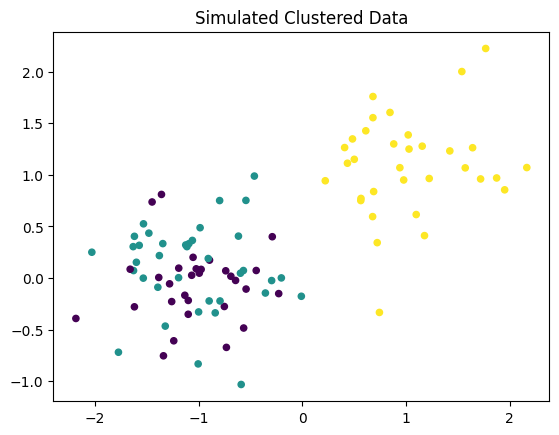

In [2]:
# Simulate some clustered data
K = 3
X = np.array([[-1, -1, 1], [0, 0, 1]])
Sigma = np.array([[0.2, 0], [0, 0.2]])
n = 100
np.random.seed(5678)
y = np.random.choice(range(1, K+1), n, replace=True)
Y = X[:, y-1] + multivariate_normal.rvs(mean=[0, 0], cov=Sigma, size=n).T

plt.figure()
plt.scatter(Y[0, :], Y[1, :], c=y, s=20)
plt.title("Simulated Clustered Data")
plt.show()


No description has been provided for this image

We first need to assign each variable to a cluster; we do this by randomly choosing the initial cluster allocation.

*Aside*: it is good practice to repeat this step more than once with different initial allocations. Think about the distinction between local and global minima!


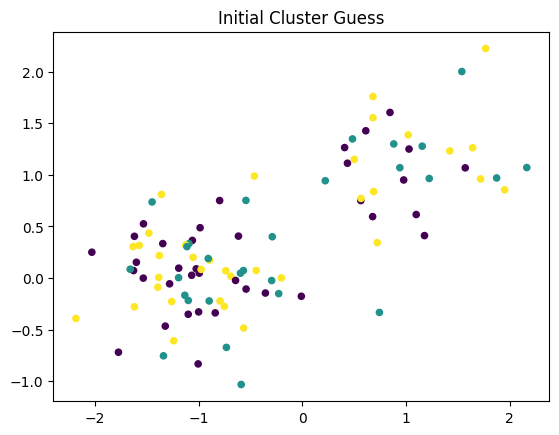

In [3]:
cluster_guess = np.random.choice(range(1, K+1), n, replace=True)

plt.figure()
plt.scatter(Y[0, :], Y[1, :], c=cluster_guess, s=20)
plt.title("Initial Cluster Guess")
plt.show()


Next: calculate the centres of each guessed cluster

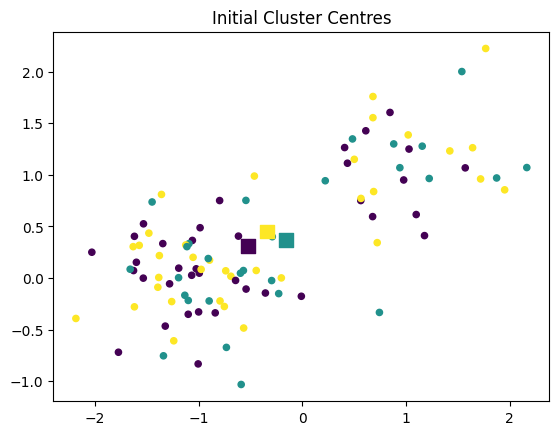

In [4]:
# Get centres for initial guess
C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T

plt.figure()
plt.scatter(Y[0, :], Y[1, :], c=cluster_guess, s=20)
plt.scatter(C[0, :], C[1, :], c=range(1, K+1), s=100, marker='s')  # cluster centres
plt.title("Initial Cluster Centres")
plt.show()


For each point we now need to check whether our initial guess was a good one.  
We do this by calculating the Euclidean distance for every point and the centre of each cluster from our initial guess:

$
d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}
$

We then update our previous guess by assigning each point to the cluster that is closest to it, and update the centre of our new clusters.


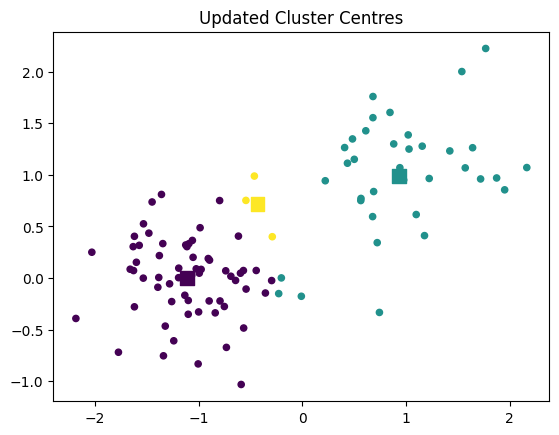

In [5]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

D = np.array([[euclidean_distance(y, C[:, k]) for k in range(K)] for y in Y.T])
cluster_guess = np.argmin(D, axis=1) + 1
cluster_counts = np.bincount(cluster_guess)

C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T

plt.figure()
plt.scatter(Y[0, :], Y[1, :], c=cluster_guess, s=20)
plt.scatter(C[0, :], C[1, :], c=range(1, K+1), s=100, marker='s')
plt.title("Updated Cluster Centres")
plt.show()


We've now updated our initial guess, and want to repeat the algorithm to see whether the updated cluster allocation is a “good” one.  
Doing this manually is tedious, and more importantly, likely to be infeasible with a large dataset or higher‑dimensional data.

So we can define a loop to do this automatically:

> **Remember** to update your `while` condition inside the loop when using a `while` statement.


In [6]:
cluster_guess = np.random.choice(range(1, K+1), n, replace=True)
check = n  # initialise stopping condition
C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T

counter = 0
while check != 0:  # iterate until no observations change cluster
    D = np.array([[euclidean_distance(y, C[:, k]) for k in range(K)] for y in Y.T])
    check = np.sum(cluster_guess != np.argmin(D, axis=1) + 1)
    cluster_guess = np.argmin(D, axis=1) + 1
    cluster_counts = np.bincount(cluster_guess)
    C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T
    counter += 1

print("Cluster Counts:", cluster_counts)


Cluster Counts: [ 0 25 43 32]


Some extra code that will update the plots every time we go through the loop:


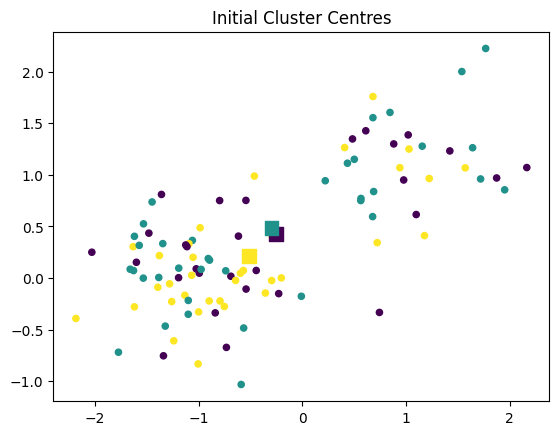

In [7]:
# Iteration with plots updating
cluster_guess = np.random.choice(range(1, K+1), n, replace=True)
check = n
C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T

plt.figure()
plt.scatter(Y[0, :], Y[1, :], c=cluster_guess, s=20)
plt.scatter(C[0, :], C[1, :], c=range(1, K+1), s=100, marker='s')
plt.title("Initial Cluster Centres")
plt.show()


Putting the other two pieces of code together, we can run the K‑means algorithm below:


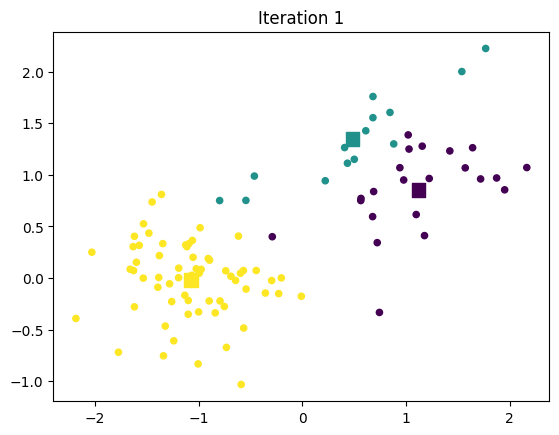

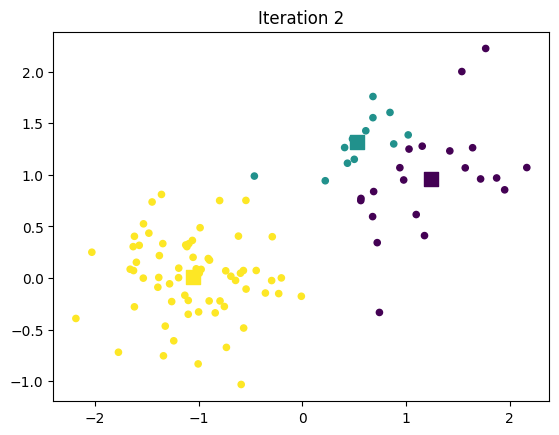

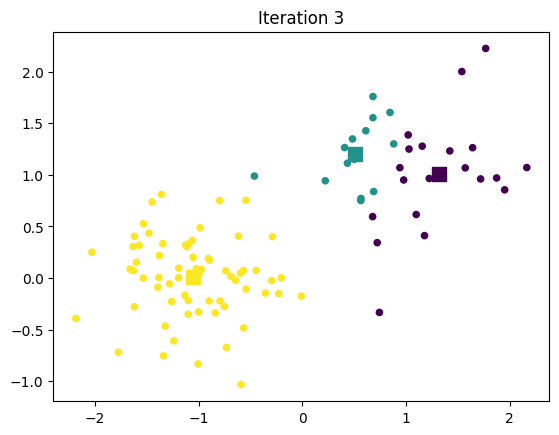

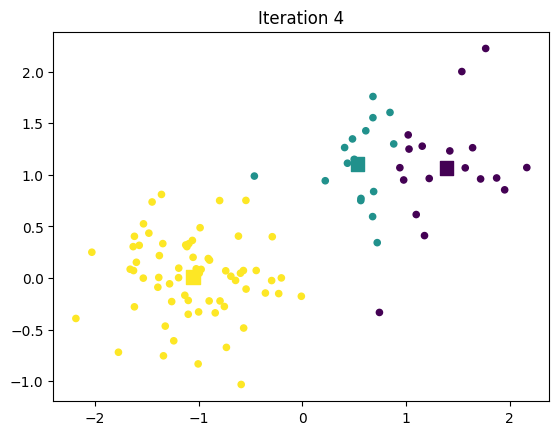

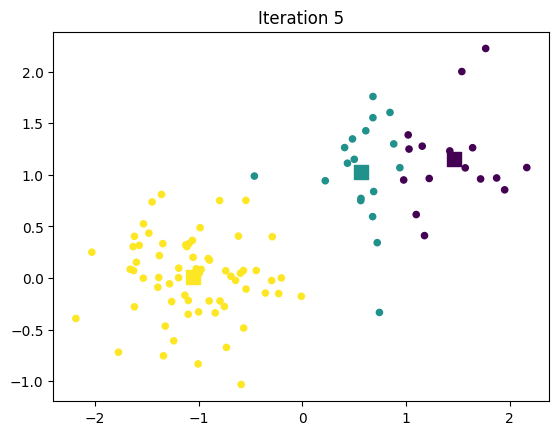

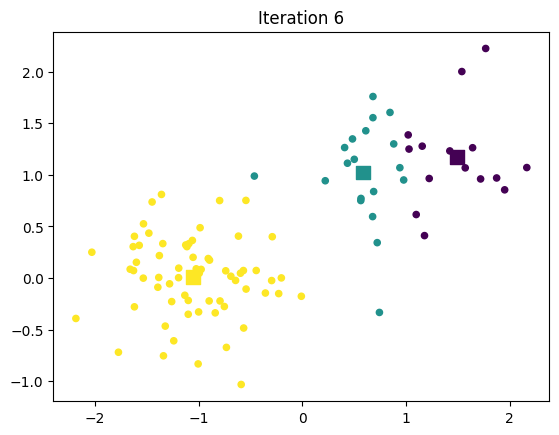

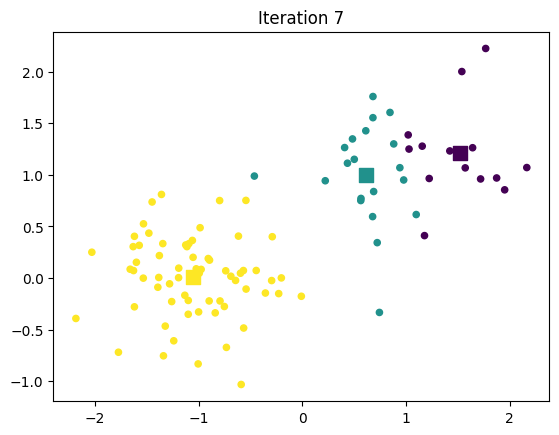

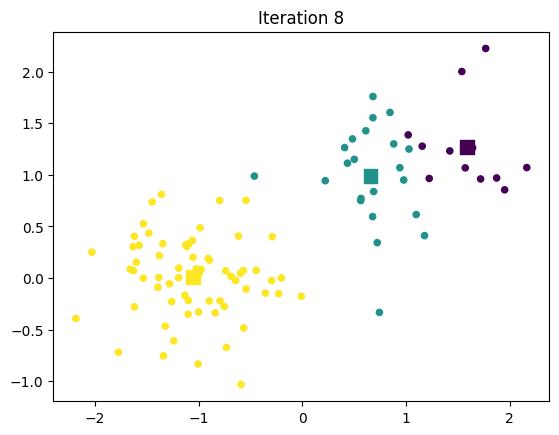

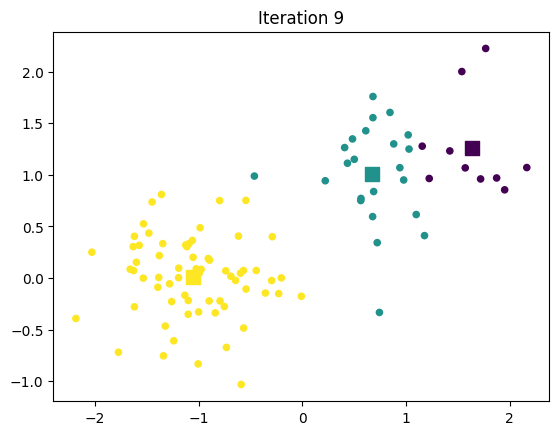

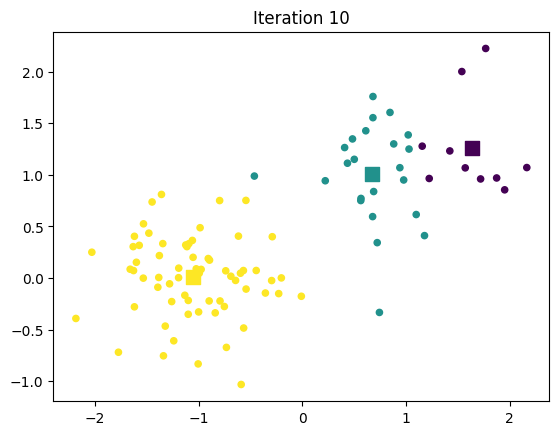

In [8]:
counter = 0
while check != 0:
    D = np.array([[euclidean_distance(y, C[:, k]) for k in range(K)] for y in Y.T])
    check = np.sum(cluster_guess != np.argmin(D, axis=1) + 1)
    cluster_guess = np.argmin(D, axis=1) + 1
    C = np.array([np.mean(Y[:, cluster_guess == k], axis=1) for k in range(1, K+1)]).T
    counter += 1

    plt.figure()
    plt.scatter(Y[0, :], Y[1, :], c=cluster_guess, s=20)
    plt.scatter(C[0, :], C[1, :], c=range(1, K+1), s=100, marker='s')
    plt.title(f"Iteration {counter}")
    plt.show()


## Bonus

For completeness – using the inbuilt python package.  
(Note that `random_state` being set to an integer is the same as specifying the seed in `np.random` earlier.)


Cluster Counts: [21 67 12]


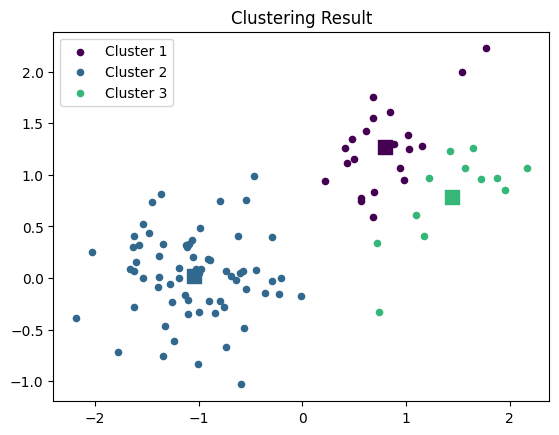

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

# Simulate some clustered data
K = 3
X = np.array([[-1, -1, 1], [0, 0, 1]])
Sigma = np.array([[0.2, 0], [0, 0.2]])
n = 100
np.random.seed(5678)
y = np.random.choice(range(1, K+1), n, replace=True)
Y = X[:, y-1] + multivariate_normal.rvs(mean=[0, 0], cov=Sigma, size=n).T

# Create an instance of KMeans with multiple initialisations
kmeans = KMeans(n_clusters=K, n_init=10, random_state=None)

# Fit the KMeans model to the data
kmeans.fit(Y.T)

print("Cluster Counts:", np.bincount(kmeans.labels_))

# Plot
cmap = plt.colormaps['viridis']
colors = [cmap(i / K) for i in range(K)]

plt.figure()
for k in range(K):
    plt.scatter(Y[0, kmeans.labels_ == k], Y[1, kmeans.labels_ == k],
                c=[colors[k]], s=20, label=f"Cluster {k+1}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c=colors, s=100, marker='s')
plt.title("Clustering Result")
plt.legend()
plt.show()


Cluster counts: [ 9 67 24]


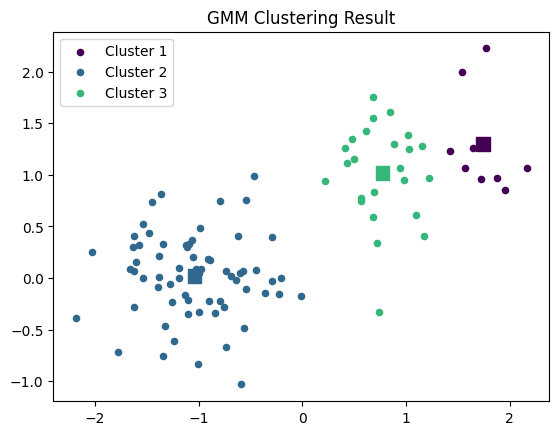

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture        # ← NEW import

# ----------------------------
# 1) Simulate some clustered data
# ----------------------------
K = 3
X = np.array([[-1, -1, 1], [0, 0, 1]])
Sigma = np.array([[0.2, 0], [0, 0.2]])
n = 100
np.random.seed(5678)
y = np.random.choice(range(1, K + 1), n, replace=True)
Y = X[:, y - 1] + multivariate_normal.rvs(mean=[0, 0], cov=Sigma, size=n).T   # shape (2, n)

# ----------------------------
# 2) Fit a Gaussian Mixture model (instead of K-means)
# ----------------------------
gmm = GaussianMixture(
    n_components=K,
    covariance_type="full",
    n_init=10,
    random_state=None
)
gmm.fit(Y.T)                        # rows are samples, so transpose

labels = gmm.predict(Y.T)          # hard cluster assignment (like kmeans.labels_)

print("Cluster counts:", np.bincount(labels))

# ----------------------------
# 3) Plot the result
# ----------------------------
cmap = plt.colormaps["viridis"]
colors = [cmap(i / K) for i in range(K)]

plt.figure()
for k in range(K):
    plt.scatter(
        Y[0, labels == k],
        Y[1, labels == k],
        c=[colors[k]],
        s=20,
        label=f"Cluster {k + 1}"
    )

# GMM component means
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c=colors,
    s=100,
    marker="s"
)

plt.title("GMM Clustering Result")
plt.legend()
plt.show()
